<IPython.core.display.Javascript object>


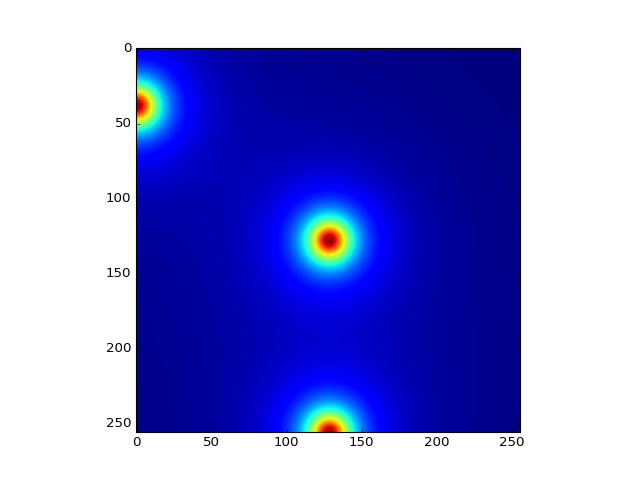

In [97]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib notebook
N = 256
def func( i , j ):
    global N
    x = float( i - N / 2 ) / N * 2.0
    y = float( j - N / 2 ) / N * 2.0
    points = [ [ 1.0 , 0.0 ] , [ 0.0 , 0.0 ] , [ -0.7 , -1.0 ] ]
    val = 0.0
    for point in points:
        dx = x - point[ 0 ]
        dy = y - point[ 1 ]
        val += 10.0 / ( 0.1 + (dx * dx + dy * dy)*10.0 )
    return val
src = np.ndarray([256,256])
for i in range( 0 , N ):
    for j in range( 0 , N ):
        src[ i , j ] = func( i , j )

imshow(np.asarray(src))

In [115]:
ig = np.ndarray([N,N])
ig[ 0 , 0 ] = src[ 0 , 0 ]
for y in range( 1 , N ):
    ig[ 0 , y ] = src[ 0 , y ] + ig[ 0 , y - 1 ]
for x in range( 1 , N ):
    ig[ x , 0 ] = src[ x , 0 ] + ig[ x - 1 , 0 ]
for i in range( 1 , N ):
    for j in range( 1 , N ):
        ig[ i , j ] = src[ i , j ] + ig[ i , j - 1 ] + ig[ i - 1 , j ] - ig[ i - 1 , j - 1 ]
for i in range( 0 , N ):
    for j in range( 0 , N ):
        ig[ i , j ] = ig[ i , j ] / ig[ N - 1 , N - 1 ]
#
yp = np.ndarray( [N,1])
ypinv = np.ndarray( [N,1])
for j in range( 0 , N ):
    yp[ j ] = ig[ j , N - 1 ] * (N-1)
for j in range( 0 , N ):
    ypinv[ int( yp[ j ] ) ] = j
ypinv[(N-1) ] = (N-1)
ypinv[0 ] = 0
def heal(arr):
    for iter in range( 0 , 10 ):
        for j in range( 1 , N - 2 ):
            if abs(arr[ j ]) < 1.0e-3:
                arr[ j ] = (arr[ j - 1 ] + arr[ j + 1 ]) * 0.5
    for iter in range( 0 , 10 ):
        for j in range( 1 , N - 1 ):
            diff = -2*arr[ j ] + arr[ j + 1 ] + arr[ j - 1 ]
            if diff > 2.0:
                arr[ j ] = (arr[ j - 1 ] + arr[ j + 1 ]) * 0.5
heal(ypinv)
ig = np.ndarray([N,N])
ig[ 0 , 0 ] = src[ 0 , 0 ]
for x in range( 0 , N ):
    ig[ x , 0 ] = src[ x , 0 ]
for y in range( 1 , N ):
    for x in range( 0 , N ):
        ig[ x , y ] = src[ x , y ] + ig[ x , y - 1 ]
for i in range( 0 , N ):
    for j in range( 0 , N ):
        ig[ i , j ] = ig[ i , j ] / ig[ i , N - 1 ]
iginv = np.ndarray([N,N])
for i in range( 0 , N ):
    tmp = np.ndarray( [N,1])
    for j in range( 1 , N ):
        tmp[ int( ig[ i , j ] / ig[ i , (N-1) ] * (N-1) ) ] = j
    heal(tmp)
    for j in range( 0 , N ):
        iginv[ i , j ] = tmp[ j ]
#imshow(np.asarray(iginv))

<IPython.core.display.Javascript object>


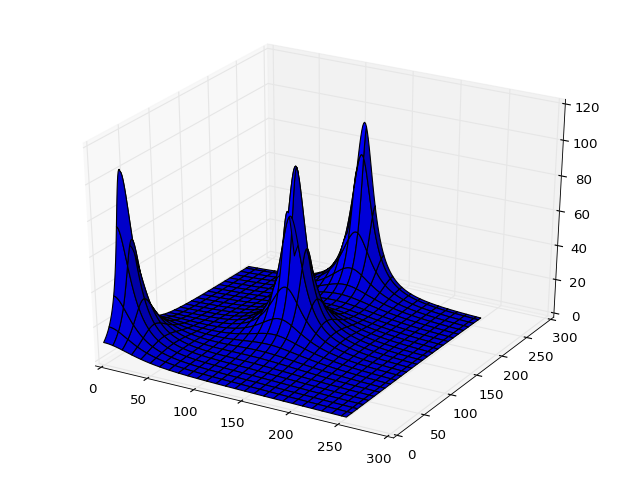

In [116]:
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X = np.arange(0, N)
Y = np.arange(0, N)
X, Y = np.meshgrid(X, Y)
ha.plot_surface(X, Y, src)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


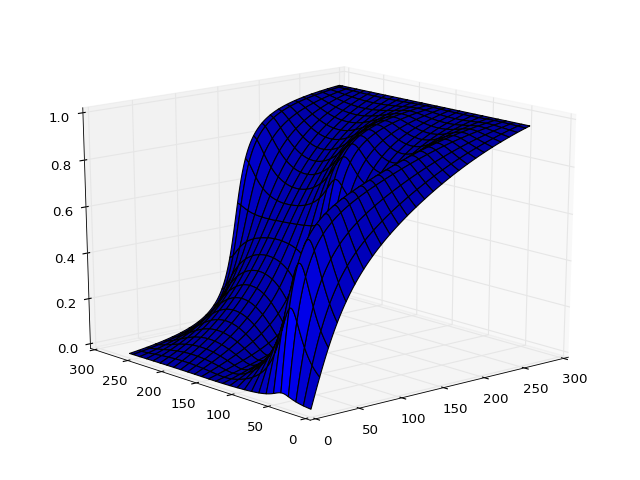

In [117]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X = np.arange(0, N)
Y = np.arange(0, N)
X, Y = np.meshgrid(X, Y)
ha.plot_surface(X, Y, ig)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


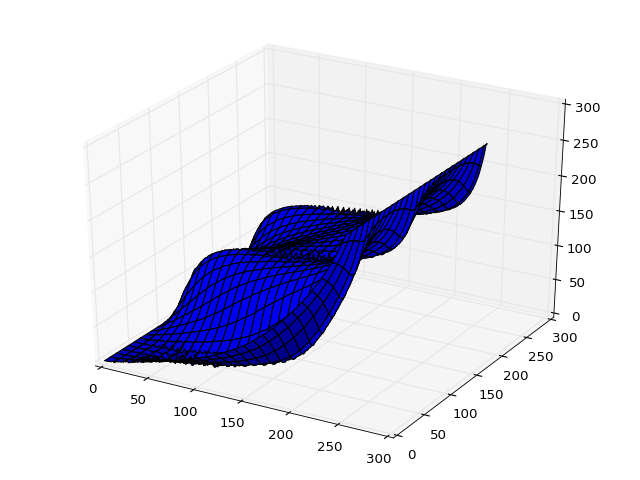

In [118]:
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X = np.arange(0, N)
Y = np.arange(0, N)
X, Y = np.meshgrid(X, Y)
ha.plot_surface(X, Y, iginv)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


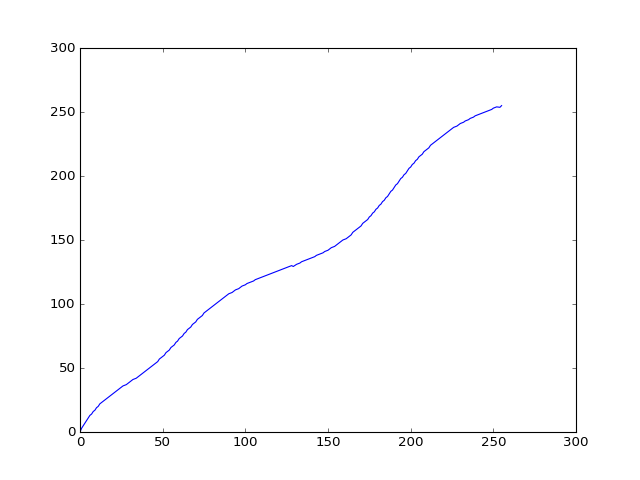

<IPython.core.display.Javascript object>


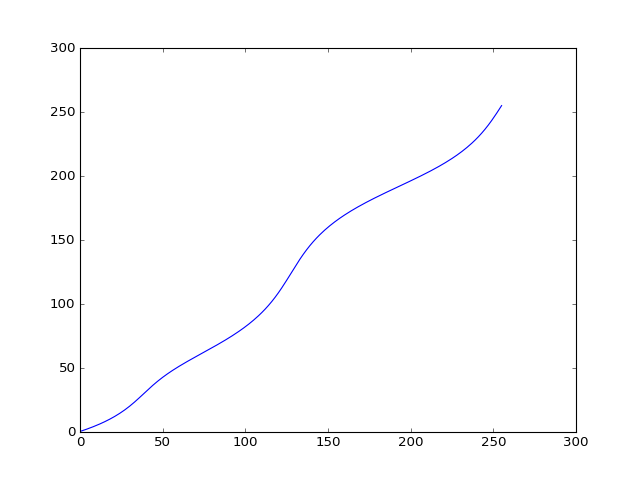

In [119]:
hf = plt.figure()
plt.plot(ypinv)
plt.show()
hf = plt.figure()
plt.plot(yp)
plt.show()

<IPython.core.display.Javascript object>


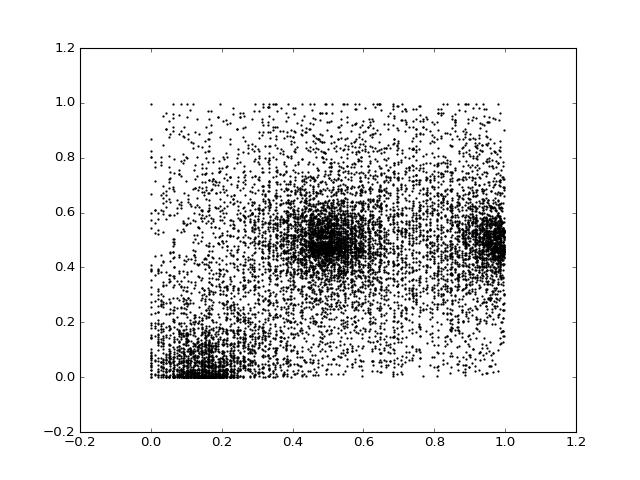

In [120]:
import matplotlib.pyplot as plt
alpha = plt.figure()
def randX():
    rand = np.random.rand()
    return ypinv[ int( rand * (N-1) ) ] / (N-1)
def randY( x ):
    rand = np.random.rand()
    return iginv[ int( x * (N-1) ) , int( rand * (N-1) ) ] / (N-1)
x, y = np.ndarray([10000]), np.ndarray([10000])
for i in range( 0 , 10000 ):
    x[ i ] = randX()
    y[ i ] = randY(x[ i ])
plt.scatter(x, y,  s=1)
plt.show()